Import Libraries:

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import geopandas as gpd
import zipfile
import io

!pip install python-igraph

In [ ]:
!pip install python-igraph

Load settlement data:


In [ ]:
upload = files.upload()
settlements = pd.read_csv('/content/settlements.csv')

Saving settlements.csv to settlements (2).csv


In [ ]:
settlements.head()

,id_unique,name,name_alt,def_comments,loc_1,loc_2,loc_3,loc_4,loc_5,loc_x,...,pop_1871,pop_1875,pop_1880,pop_1885,pop_1890,pop_1895,pop_1900,pop_1905,pop_1910,id_cantoni
0,8641,Berlin,NaN,NaN,Preußen,Berlin,NaN,NaN,NaN,13.40000,...,826341.0,966858,1122504,1315287,1578794,1677304,1888848,2040148.0,2071257.0,7010.0
1,38804,Aachen,NaN,NaN,Preußen,Rheinprovinz,Aachen,Stadtkreis,NaN,6.08416,...,74146.0,79606,85551,95725,103470,110551,135245,151971.0,156143.0,14001.0
2,38805,Alsdorf,NaN,NaN,Preußen,Rheinprovinz,Aachen,Aachen,NaN,6.16000,...,1752.0,2123,2494,2683,2954,3307,3730,4916.0,6812.0,14003.0
3,38808,Broich,Broich (Broichweiden),NaN,Preußen,Rheinprovinz,Aachen,Aachen,NaN,6.16450,...,2566.0,2567,2650,2784,2887,3057,3182,3287.0,5603.0,NaN
4,38806a,Burtscheid,NaN,1.4.1897: Eingemeindung nach Aachen,Preußen,Rheinprovinz,Aachen,Aachen,NaN,6.09333,...,10081.0,10220,10989,12139,13388,15871,0,0.0,0.0,14002.0


In [ ]:
num_rows = settlements.shape[0]
print("Number of rows in 'settlements' DataFrame:", num_rows)

Number of rows in 'settlements' DataFrame: 1874


In [ ]:
settlements.columns

Index(['id_unique', 'name', 'name_alt', 'def_comments', 'loc_1', 'loc_2',
       'loc_3', 'loc_4', 'loc_5', 'loc_x', 'loc_y', 'year_train',
       'sourceyear_train', 'pop_1864', 'pop_1867', 'pop_1871', 'pop_1875',
       'pop_1880', 'pop_1885', 'pop_1890', 'pop_1895', 'pop_1900', 'pop_1905',
       'pop_1910', 'id_cantoni'],
      dtype='object')

In [ ]:
loc_x_column = settlements['loc_y']
min_loc_x = loc_x_column.min()
max_loc_x = loc_x_column.max()

print("Minimum value in loc_x column:", min_loc_x)
print("Maximum value in loc_x column:", max_loc_x)

Minimum value in loc_x column: 48.09
Maximum value in loc_x column: 2407.0


Load PrussiaPopulation data:


In [ ]:
upload = files.upload()
PrussiaPopulation = pd.read_excel('/content/PrussiaPopulation.xlsx')

Saving PrussiaPopulation.xlsx to PrussiaPopulation (2).xlsx


In [ ]:
PrussiaPopulation.head(20)

,rbz,id_hornung,name,p_c_1816,p_m_1816,p_c_1821,p_c_1831,p_c_1834,p_m_1834,p_c_1837,...,p_c_1875,p_m_1875,p_c_1880,p_m_1880,p_c_1885,p_m_1885,p_c_1890,p_m_1890,p_c_1895,p_m_1895
0,KON,100,Memel,NaN,NaN,NaN,29619.0,NaN,NaN,31629.0,...,39299.0,8.0,40085.0,3.0,39796.0,7.0,40122.0,6.0,NaN,NaN
1,KON,101,Memel,7834.0,430.0,7702.0,7734.0,7934.0,NaN,9034.0,...,19236.0,560.0,19068.0,592.0,18102.0,646.0,18711.0,571.0,NaN,NaN
2,KON,200,Fischhausen,NaN,NaN,NaN,25120.0,NaN,NaN,27502.0,...,42982.0,635.0,44816.0,539.0,45513.0,538.0,45120.0,570.0,NaN,NaN
3,KON,201,Pillau,2492.0,799.0,NaN,3929.0,NaN,NaN,3548.0,...,3177.0,19.0,3220.0,5.0,3417.0,15.0,3264.0,39.0,NaN,NaN
4,KON,202,Fischhausen,1231.0,0.0,NaN,1504.0,NaN,NaN,1644.0,...,2458.0,1.0,2561.0,1.0,2759.0,1.0,2855.0,19.0,NaN,NaN
5,KON,300,Königsberg (Stadt),NaN,NaN,NaN,1802.0,NaN,NaN,1957.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
6,KON,301,Königsberg,56571.0,4513.0,NaN,62475.0,63064.0,6092.0,64200.0,...,116545.0,6091.0,134470.0,6439.0,143782.0,7369.0,153660.0,8006.0,NaN,NaN
7,KON,400,Königsberg (Land),NaN,NaN,NaN,34331.0,NaN,NaN,34046.0,...,51316.0,26.0,53118.0,25.0,53259.0,713.0,53789.0,1289.0,NaN,NaN
8,KON,500,Labiau,NaN,NaN,NaN,31526.0,NaN,NaN,34658.0,...,46855.0,0.0,48163.0,1.0,48395.0,5.0,48346.0,13.0,NaN,NaN
9,KON,501,Labiau,2390.0,193.0,NaN,3157.0,NaN,NaN,3515.0,...,4486.0,1.0,4682.0,1.0,4748.0,2.0,4860.0,1.0,NaN,NaN


In [ ]:
PrussiaPopulation.columns

Index(['rbz', 'id_hornung', 'name', 'p_c_1816', 'p_m_1816', 'p_c_1821',
       'p_c_1831', 'p_c_1834', 'p_m_1834', 'p_c_1837', 'p_c_1840', 'p_m_1840',
       'p_c_1843', 'p_m_1843', 'p_c_1846', 'p_m_1846', 'p_c_1849', 'p_m_1849',
       'p_c_1852', 'p_m_1852', 'p_c_1855', 'p_m_1855', 'p_c_1858', 'p_m_1858',
       'p_c_1861', 'p_m_1861', 'p_c_1864', 'p_m_1864', 'p_c_1867', 'p_m_1867',
       'p_c_1871', 'p_m_1871', 'p_c_1875', 'p_m_1875', 'p_c_1880', 'p_m_1880',
       'p_c_1885', 'p_m_1885', 'p_c_1890', 'p_m_1890', 'p_c_1895', 'p_m_1895'],
      dtype='object')

City shapefile:

In [ ]:
upload = files.upload()
gdfcities = gpd.read_file("/content/cty_shp.gpkg")

Saving cty_shp.gpkg to cty_shp.gpkg


In [ ]:
gdfcities.head()

,NAME,RBZ,TYPE,geometry
0,OSTPRIGNITZ,POT,0,"MULTIPOLYGON (((322058.327 5910792.829, 322919..."
1,RUPPIN,POT,0,"MULTIPOLYGON (((370187.020 5894707.263, 369618..."
2,WESTHAVELLAND,POT,0,"MULTIPOLYGON (((351561.700 5815316.600, 351591..."
3,TEMPLIN,POT,0,"MULTIPOLYGON (((423206.900 5900285.900, 423692..."
4,PRENZLAU,POT,0,"MULTIPOLYGON (((444890.900 5930163.500, 445335..."


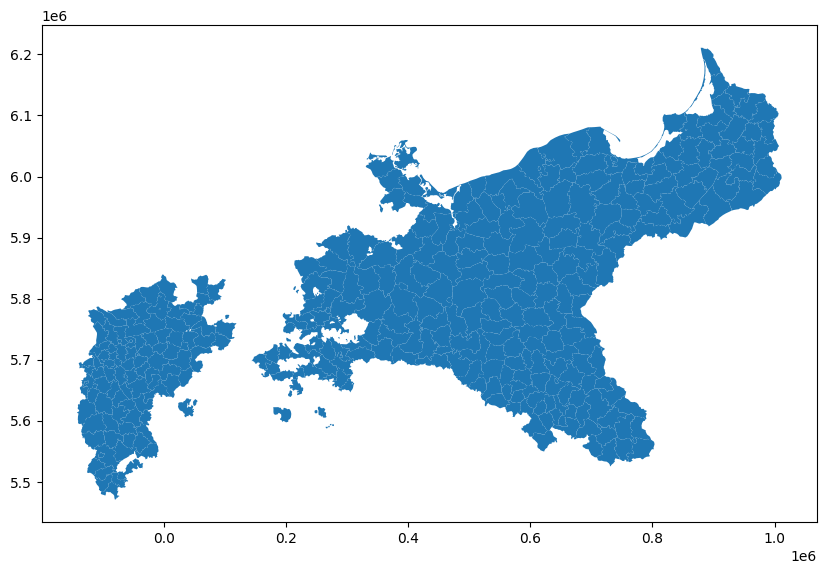

In [ ]:
gdfcities.plot(figsize=(10, 10))
plt.show()

In [ ]:
# Upload the ZIP archive
uploaded = files.upload()

# Get the first uploaded file name (assuming it's the ZIP archive)
zip_file_name = list(uploaded.keys())[0]

# Get the content of the uploaded ZIP archive
zip_content = uploaded[zip_file_name]

# Create a ZipFile object from the content
with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    # Extract the contents of the ZIP archive to a temporary directory
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

# Assuming the extracted Shapefile is named 'stations.shp'
shapefile_path = f'{temp_dir}/stations.shp'

# Read the Shapefile using GeoPandas
gdfstations = gpd.read_file(shapefile_path)

# Now you have the GeoDataFrame 'gdfstations' containing the data from the Shapefile

# Clean up the temporary directory
import shutil
shutil.rmtree(temp_dir)


Saving stations.zip to stations (8).zip


In [ ]:
gdfstations.head()

,id,opening,comment,name,opening_d,loc_exact,closing,geometry
0,NaN,1852,NaN,Mühlhausen in Ostpreußen,NaN,1.0,2015.0,POINT (19.74561 54.18642)
1,NaN,1852,NaN,Braunsberg,NaN,1.0,2019.0,POINT (19.84215 54.38095)
2,NaN,1853,NaN,Heiligenbeil,NaN,NaN,NaN,POINT (19.93482 54.46413)
3,NaN,1853,NaN,Königsberg in Preußen,NaN,NaN,NaN,POINT (20.49867 54.69327)
4,NaN,1860,NaN,Tapiau,NaN,1.0,NaN,POINT (21.06883 54.63585)


In [ ]:
num_rows = gdfstations.shape[0]
print("Number of rows in 'settlements' DataFrame:", num_rows)

Number of rows in 'settlements' DataFrame: 4153


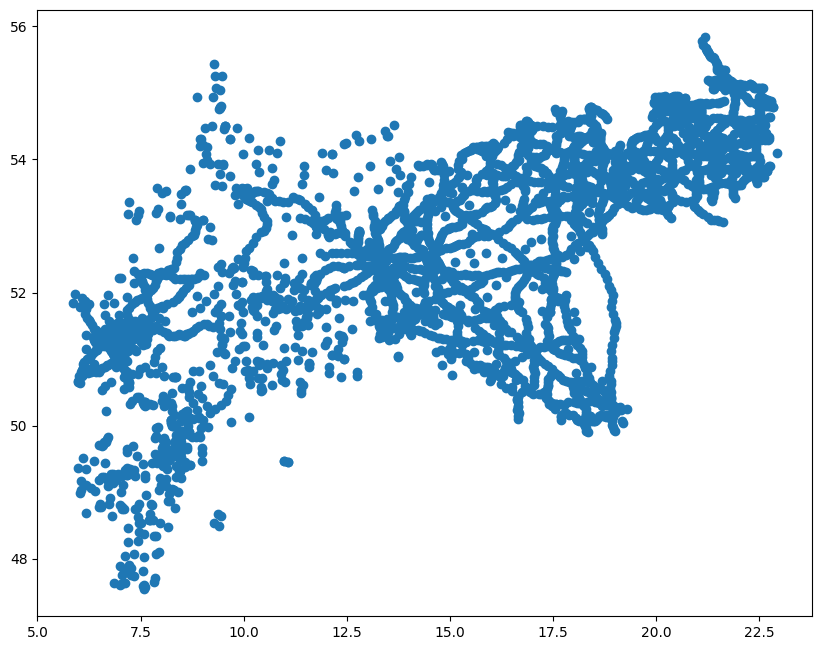

In [ ]:
gdfstations.plot(figsize=(10, 10))
plt.show()

In [ ]:
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/railways.shp'
gdfrailways = gpd.read_file(shapefile_path)

Saving railways.zip to railways (2).zip


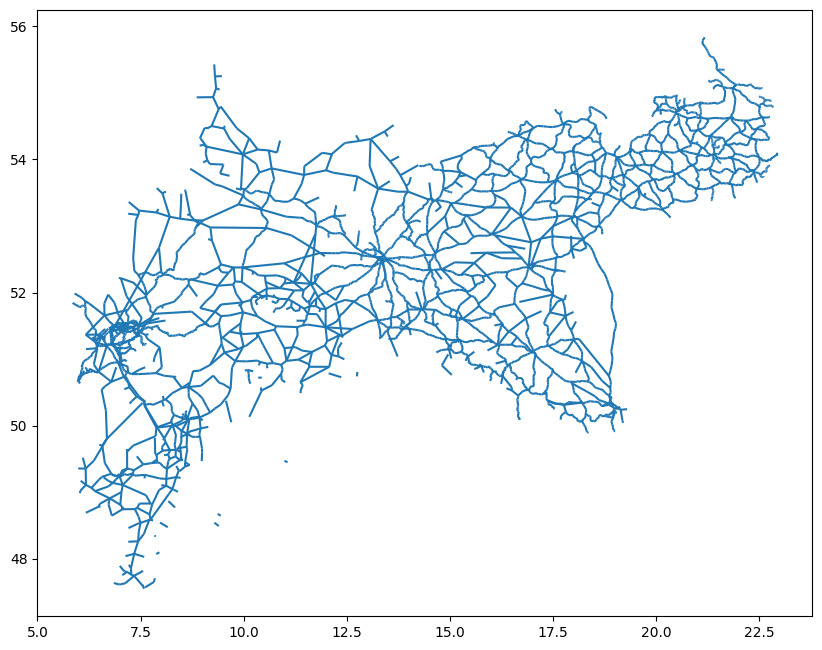

In [ ]:
gdfrailways.plot(figsize=(10, 10))
plt.show()

In [ ]:
gdfrailways.head(20)

,id,opening,comment,opening_d,loc_exact,gauge,closing,geometry
0,NaN,1852.0,Elbing-Braunsberg,19.10.1852,1.0,NaN,2012.0,"LINESTRING (19.84215 54.38095, 19.84324 54.378..."
1,NaN,1853.0,Braunsberg-Königsberg,02.08.1853,1.0,NaN,1945.0,"LINESTRING (19.93482 54.46413, 19.92202 54.458..."
2,NaN,1853.0,Braunsberg-Königsberg,02.08.1853,1.0,NaN,NaN,"LINESTRING (20.49867 54.69327, 20.49274 54.695..."
3,NaN,1860.0,Königsberg-Eydtkuhnen,06.06.1860,1.0,NaN,NaN,"LINESTRING (21.06883 54.63585, 21.05758 54.634..."
4,NaN,1860.0,Königsberg-Eydtkuhnen,06.06.1860,1.0,NaN,NaN,"LINESTRING (21.21488 54.61492, 21.18584 54.617..."
5,NaN,1899.0,Haffuferbahn (Elblag-Frauenburg-Braunsberg),NaN,1.0,NaN,2013.0,"LINESTRING (19.41556 54.15085, 19.41069 54.151..."
6,NaN,1899.0,Haffuferbahn (Elblag-Frauenburg-Braunsberg),NaN,1.0,NaN,2013.0,"LINESTRING (19.67694 54.35822, 19.67994 54.360..."
7,NaN,1852.0,Elbing-Braunsberg,19.10.1852,1.0,NaN,2012.0,"LINESTRING (19.74561 54.18642, 19.74573 54.180..."
8,NaN,1882.0,Güldeboden-Mohrungen,01.11.1882,0.0,NaN,NaN,"LINESTRING (19.57322 54.10011, 19.65634 54.05566)"
9,NaN,1883.0,Mohrungen-Allenstein,15.08.1883,0.0,NaN,NaN,"LINESTRING (19.92275 53.91907, 20.01772 53.87634)"


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Create new columns for the starting and ending points
gdfrailways['start_point'] = gdfrailways['geometry'].apply(lambda geom: geom.coords[0])
gdfrailways['end_point'] = gdfrailways['geometry'].apply(lambda geom: geom.coords[-1])

# Convert the points to separate Point geometry objects
gdfrailways['start_point'] = gdfrailways['start_point'].apply(Point)
gdfrailways['end_point'] = gdfrailways['end_point'].apply(Point)

In [ ]:
gdfrailways.head()

,id,opening,comment,opening_d,loc_exact,gauge,closing,geometry,start_point,end_point
0,NaN,1852.0,Elbing-Braunsberg,19.10.1852,1.0,NaN,2012.0,"LINESTRING (19.84215 54.38095, 19.84324 54.378...",POINT (19.842153176802963 54.380947161134095),POINT (19.84249562394669 54.339341715981334)
1,NaN,1853.0,Braunsberg-Königsberg,02.08.1853,1.0,NaN,1945.0,"LINESTRING (19.93482 54.46413, 19.92202 54.458...",POINT (19.934824431959385 54.46413474044381),POINT (19.842153176802963 54.380947161134095)
2,NaN,1853.0,Braunsberg-Königsberg,02.08.1853,1.0,NaN,NaN,"LINESTRING (20.49867 54.69327, 20.49274 54.695...",POINT (20.49866927626795 54.69327109962618),POINT (20.47040112509105 54.68201368273207)
3,NaN,1860.0,Königsberg-Eydtkuhnen,06.06.1860,1.0,NaN,NaN,"LINESTRING (21.06883 54.63585, 21.05758 54.634...",POINT (21.068826332354664 54.63584686644256),POINT (20.982554163053948 54.63311460410335)
4,NaN,1860.0,Königsberg-Eydtkuhnen,06.06.1860,1.0,NaN,NaN,"LINESTRING (21.21488 54.61492, 21.18584 54.617...",POINT (21.214882619483845 54.61492134686171),POINT (21.068826332354664 54.63584686644256)


In [ ]:
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/German_Union (GER)_1820_v.1.0.shp'
gdfrailways = gpd.read_file(shapefile_path)

Saving Archive.zip to Archive.zip


In [ ]:
gdfrailways.head()

,AREA,PERIMETER,ID,LAND,NAME,STATUS,Rb,TYPE,geometry
0,797.203810,335.348398,11101,11100,ANHALT-DESSAU,TS,/,/,"MULTIPOLYGON (((320439.500 5769708.700, 319807..."
1,790.429135,303.104455,11301,11300,ANHALT-BERNBURG,TS,/,/,"MULTIPOLYGON (((335960.400 5761583.000, 335675..."
2,810.237301,332.961190,11201,11200,ANHALT-KOETHEN,TS,/,/,"MULTIPOLYGON (((314533.696 5762316.467, 313403..."
3,821.444932,287.859585,9002,9000,SCHOENINGENSCHER DISTRIKT,OM,/,/,"MULTIPOLYGON (((225602.800 5824421.800, 224809..."
4,1122.220448,239.808317,9003,9000,WOLFENBUETTELSCHER DISTRIKT,OM,/,/,"MULTIPOLYGON (((211347.580 5807066.124, 211067..."


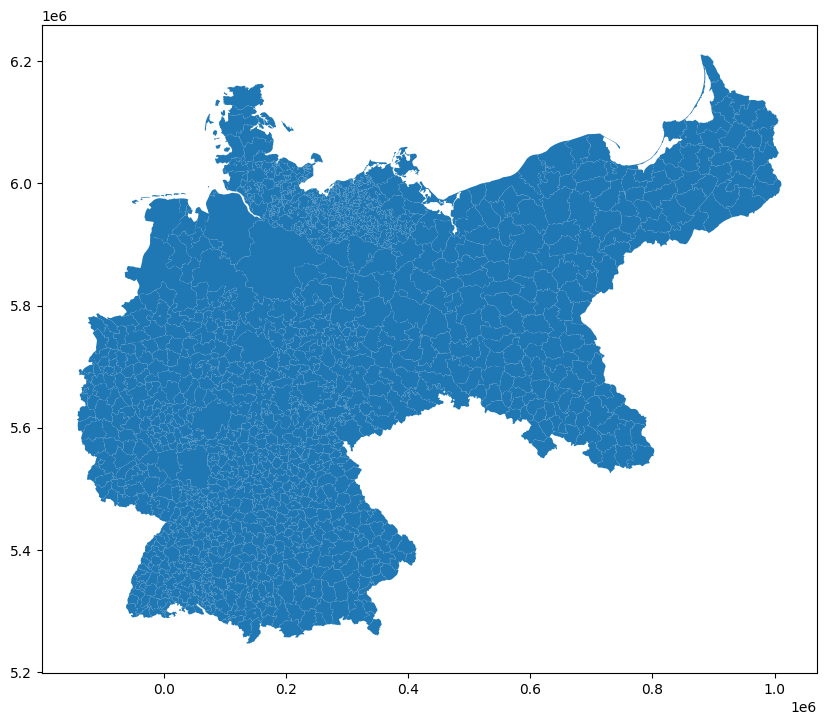

In [ ]:
gdfrailways.plot(figsize=(10, 10))
plt.show()

In [ ]:
# Upload the .dta file
uploaded = files.upload()

# Assuming the uploaded file is named 'hornung-rail-panel-city.dta'
file_name = 'hornung-rail-panel-city.dta'
df = pd.read_stata(file_name)
df.head()

Saving hornung-rail-panel-city.dta to hornung-rail-panel-city.dta


,townkey1849,city,kreiskey1849,year,popcivil,popmilitary,areachange,railaccess,node,distance,stateown,stateadmin,slc,within15km_1861
0,101,Memel,1,1837,9034.0,NaN,0,0.0,0.0,NaN,NaN,NaN,0,0.0
1,101,Memel,1,1840,9188.0,24.0,0,0.0,0.0,8.371646,0.0,0.0,0,0.0
2,101,Memel,1,1843,9972.0,54.0,0,0.0,0.0,6.084106,0.0,0.0,0,0.0
3,101,Memel,1,1846,9710.0,196.0,0,0.0,0.0,6.084106,0.0,0.0,0,0.0
4,101,Memel,1,1849,10303.0,476.0,0,0.0,0.0,5.361583,0.0,0.0,0,0.0


In [ ]:
df.columns

Index(['townkey1849', 'city', 'kreiskey1849', 'year', 'popcivil',
       'popmilitary', 'areachange', 'railaccess', 'node', 'distance',
       'stateown', 'stateadmin', 'slc', 'within15km_1861'],
      dtype='object')

In [ ]:
dfPopulation = PrussiaPopulation.copy()

In [ ]:
gdfRails = gdfrailways.copy()

In [ ]:
gdfStations = gdfstations.copy()

In [ ]:
gdfPlaces = gdfstations.head(5).copy()

In [ ]:
gdfPlaces.head()

,id,opening,comment,name,opening_d,loc_exact,closing,geometry
0,NaN,1852,NaN,Mühlhausen in Ostpreußen,NaN,1.0,2015.0,POINT (19.74561 54.18642)
1,NaN,1852,NaN,Braunsberg,NaN,1.0,2019.0,POINT (19.84215 54.38095)
2,NaN,1853,NaN,Heiligenbeil,NaN,NaN,NaN,POINT (19.93482 54.46413)
3,NaN,1853,NaN,Königsberg in Preußen,NaN,NaN,NaN,POINT (20.49867 54.69327)
4,NaN,1860,NaN,Tapiau,NaN,1.0,NaN,POINT (21.06883 54.63585)


In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime as dt
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from dateutil.relativedelta import relativedelta
import igraph
from shapely.geometry import LineString

# pathProject = os.path.join(...)
# pathInputShapesRailways = os.path.join(pathProject, 'shapefiles')
# pathInputShapesCities = os.path.join(pathInputShapes, 'cities.shp')
# pathShpRails = os.path.join(pathInputShapesRailways, 'railways.shp')
# pathShpStations = os.path.join(pathInputShapesRailways, 'stations.shp')
# projectCRS = 3035
# pathInputPopulation = r'https://docs.google.com/spreadsheets/d/e/2PACX-1vShBVnJM6eFa6LLjk1wZDbwZJWXmU5Ye4xTgq8tx0s4rsrY6MzvCUZvigFO909ldKmrMtKqO5zieZXV/pub?output=csv'

# #Read in data
# gdfRails = gpd.read_file(pathShpRails).to_crs(NetworkCRS)
# gdfStations = gpd.read_file(pathShpStations).to_crs(NetworkCRS)
# gdfPlaces = gpd.read_file(pathInputShapesCities).to_crs(NetworkCRS)

# #Get population estimates
# dfPopulation = pd.read_csv(pathInputPopulation)

# #Add Königsberg (Stadt) rural area to the city
# dfPopulation.loc[dfPopulation['id_hornung'] == 301, [var for var in dfPopulation.columns if var.startswith('p_')]] = dfPopulation.loc[dfPopulation['id_hornung'] == 301, [var for var in dfPopulation.columns if var.startswith('p_')]].values + dfPopulation.loc[dfPopulation['id_hornung'] == 300, [var for var in dfPopulation.columns if var.startswith('p_')]].fillna(0).values
# dfPopulation = dfPopulation.drop(dfPopulation.loc[dfPopulation['id_hornung'] == 300].index)

#Estimate 1831 and 1837 military population from 1840 ratio
dfPopulation['p_m_1831'] = dfPopulation['p_c_1831'] * (dfPopulation['p_m_1840'] / dfPopulation['p_c_1840'])
dfPopulation['p_m_1837'] = dfPopulation['p_c_1837'] * (dfPopulation['p_m_1840'] / dfPopulation['p_c_1840'])

#Get total population
censusYears = [1831, 1837, 1840, 1843, 1846, 1849, 1852, 1855, 1858, 1861, 1864, 1867, 1871, 1875]
for year in censusYears:
    try:
        dfPopulation[f'p_t_{year}'] = dfPopulation[f'p_c_{year}'] + dfPopulation[f'p_m_{year}']
    except:
        pass

#Interpolate population for missing years
for year in [year for year in range(1831,1875+1) if year not in censusYears]:
    year1 = min([el for el in censusYears if el < year], key=lambda x:abs(x-year))
    year2 = min([el for el in censusYears if el > year], key=lambda x:abs(x-year))
    lnpop1 = np.log(dfPopulation[f'p_t_{year1}'])
    lnpop2 = np.log(dfPopulation[f'p_t_{year2}'])
    lnpop = np.linspace(lnpop1, lnpop2, year2 - year1 + 1)[year - year1]
    pop = np.exp(lnpop)
    dfPopulation[f'p_t_{year}'] = pop

#Network params
projectCRS = "EPSG:4326"  # Example CRS: WGS 84
NetworkCRS = projectCRS #Calculate feature length in meters.
train_speed = 60*1000 #m/h
walking_speed = 5*1000 #m/h

gdfRails['opening'] = gdfRails['opening'].fillna(0)
gdfStations['opening'] = gdfStations['opening'].fillna(0)
gdfRails['closing'] = gdfRails['closing'].fillna(9999)
gdfStations['closing'] = gdfStations['closing'].fillna(9999)

#Assign unique IDs to stations
gdfStations.set_index(np.arange(100000, 100000+len(gdfStations), 1), inplace=True)
gdfStations['coordX'] = gdfStations.geometry.x
gdfStations['coordY'] = gdfStations.geometry.y

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:134: RuntimeWarning: invalid value encountered in subtract
  delta = stop - start
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:148: RuntimeWarning: invalid value encountered in multiply
  y = y * delta


In [ ]:
gdfStations.head()

,id,opening,comment,name,opening_d,loc_exact,closing,geometry,coordX,coordY
100000,NaN,1852,NaN,Mühlhausen in Ostpreußen,NaN,1.0,2015.0,POINT (19.74561 54.18642),19.745608,54.186420
100001,NaN,1852,NaN,Braunsberg,NaN,1.0,2019.0,POINT (19.84215 54.38095),19.842153,54.380947
100002,NaN,1853,NaN,Heiligenbeil,NaN,NaN,9999.0,POINT (19.93482 54.46413),19.934824,54.464135
100003,NaN,1853,NaN,Königsberg in Preußen,NaN,NaN,9999.0,POINT (20.49867 54.69327),20.498669,54.693271
100004,NaN,1860,NaN,Tapiau,NaN,1.0,9999.0,POINT (21.06883 54.63585),21.068826,54.635847


In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime as dt
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from dateutil.relativedelta import relativedelta
import igraph
from shapely.geometry import LineString

# pathProject = os.path.join(...)
# pathInputShapesRailways = os.path.join(pathProject, 'shapefiles')
# pathInputShapesCities = os.path.join(pathInputShapes, 'cities.shp')
# pathShpRails = os.path.join(pathInputShapesRailways, 'railways.shp')
# pathShpStations = os.path.join(pathInputShapesRailways, 'stations.shp')
# projectCRS = 3035
# pathInputPopulation = r'https://docs.google.com/spreadsheets/d/e/2PACX-1vShBVnJM6eFa6LLjk1wZDbwZJWXmU5Ye4xTgq8tx0s4rsrY6MzvCUZvigFO909ldKmrMtKqO5zieZXV/pub?output=csv'

# #Read in data
# gdfRails = gpd.read_file(pathShpRails).to_crs(NetworkCRS)
# gdfStations = gpd.read_file(pathShpStations).to_crs(NetworkCRS)
# gdfPlaces = gpd.read_file(pathInputShapesCities).to_crs(NetworkCRS)

# #Get population estimates
# dfPopulation = pd.read_csv(pathInputPopulation)

# #Add Königsberg (Stadt) rural area to the city
# dfPopulation.loc[dfPopulation['id_hornung'] == 301, [var for var in dfPopulation.columns if var.startswith('p_')]] = dfPopulation.loc[dfPopulation['id_hornung'] == 301, [var for var in dfPopulation.columns if var.startswith('p_')]].values + dfPopulation.loc[dfPopulation['id_hornung'] == 300, [var for var in dfPopulation.columns if var.startswith('p_')]].fillna(0).values
# dfPopulation = dfPopulation.drop(dfPopulation.loc[dfPopulation['id_hornung'] == 300].index)

#Estimate 1831 and 1837 military population from 1840 ratio
dfPopulation['p_m_1831'] = dfPopulation['p_c_1831'] * (dfPopulation['p_m_1840'] / dfPopulation['p_c_1840'])
dfPopulation['p_m_1837'] = dfPopulation['p_c_1837'] * (dfPopulation['p_m_1840'] / dfPopulation['p_c_1840'])

#Get total population
censusYears = [1831, 1837, 1840, 1843, 1846, 1849, 1852, 1855, 1858, 1861, 1864, 1867, 1871, 1875]
for year in censusYears:
    try:
        dfPopulation[f'p_t_{year}'] = dfPopulation[f'p_c_{year}'] + dfPopulation[f'p_m_{year}']
    except:
        pass

#Interpolate population for missing years
for year in [year for year in range(1831,1875+1) if year not in censusYears]:
    year1 = min([el for el in censusYears if el < year], key=lambda x:abs(x-year))
    year2 = min([el for el in censusYears if el > year], key=lambda x:abs(x-year))
    lnpop1 = np.log(dfPopulation[f'p_t_{year1}'])
    lnpop2 = np.log(dfPopulation[f'p_t_{year2}'])
    lnpop = np.linspace(lnpop1, lnpop2, year2 - year1 + 1)[year - year1]
    pop = np.exp(lnpop)
    dfPopulation[f'p_t_{year}'] = pop

#Network params
projectCRS = "EPSG:4326"  # Example CRS: WGS 84
NetworkCRS = projectCRS #Calculate feature length in meters.
train_speed = 60*1000 #m/h
walking_speed = 5*1000 #m/h

gdfRails['opening'] = gdfRails['opening'].fillna(0)
gdfStations['opening'] = gdfStations['opening'].fillna(0)
gdfRails['closing'] = gdfRails['closing'].fillna(9999)
gdfStations['closing'] = gdfStations['closing'].fillna(9999)

#Assign unique IDs to stations
gdfStations.set_index(np.arange(100000, 100000+len(gdfStations), 1), inplace=True)
gdfStations['coordX'] = gdfStations.geometry.x
gdfStations['coordY'] = gdfStations.geometry.y

#Infer orign and destination IDs for railway lines
def get_station_ids(geom):
    coordsO = geom.coords[0]
    coordsD = geom.coords[-1]
    idxO = gdfStations.index[(gdfStations['coordX'] == coordsO[0]) & (gdfStations['coordY'] == coordsO[1])][0]
    idxD = gdfStations.index[(gdfStations['coordX'] == coordsD[0]) & (gdfStations['coordY'] == coordsD[1])][0]
    return (idxO, idxD)

gdfRails[['oID', 'dID']] = gdfRails.apply(lambda x: get_station_ids(x.geometry), result_type='expand', axis=1)

#Get all unique combinations of city pairs - origin-destination matrix
odXcoords = list(gdfPlaces.geometry.x)
odYcoords = list(gdfPlaces.geometry.y)
odIndices = list(gdfPlaces.index)
odMatrix = [combi for combi in list(itertools.combinations(zip(odXcoords, odYcoords, odIndices), 2))]

#You can always walk from city to city.
#TODO: For now assume straight line, later use terrain-based model.
geomsWalk = [LineString(coordinates=[(od[0][0], od[0][1]), (od[1][0], od[1][1])]) for od in odMatrix]
oIdsWalk = [od[0][2] for od in odMatrix]
dIdsWalk = [od[1][2] for od in odMatrix]
gdfWalkCities = gpd.GeoDataFrame(geometry=geomsWalk, data=zip(oIdsWalk, dIdsWalk), crs=NetworkCRS, columns=['oID', 'dID'])

#You can always walk from station to station.
#TODO: For now assume straight line, later use model.
geomsWalkStations = [LineString(coordinates=[(combi[0][0], combi[0][1]), (combi[1][0], combi[1][1])]) for combi in list(itertools.combinations(zip(gdfStations.geometry.x, gdfStations.geometry.y), 2))]
dataWalkStations = [np.array(combi).flatten() for combi in list(itertools.combinations(zip(gdfStations.index, gdfStations.name, gdfStations.opening, gdfStations.closing), 2))]
gdfWalkStations = gpd.GeoDataFrame(data=dataWalkStations, geometry=geomsWalkStations, crs=gdfStations.crs, columns=['oID', 'name_1', 'opening_1', 'closing_1', 'dID', 'name_2', 'opening_2', 'closing_2'])

#You can always walk from city to station.
#TODO: For now assume straight line, later use model.
geomsWalkCitiesToStations = [LineString(coordinates=[(city[0], city[1]), (station[0], station[1])]) for city in zip(odXcoords, odYcoords) for station in zip(gdfStations.geometry.x, gdfStations.geometry.y)]
dataWalkCitiesToStations = [np.array([cityId, station[0], station[1], station[2]]) for cityId in odIndices for station in zip(gdfStations.index, gdfStations.opening, gdfStations.closing)]
gdfWalkCitiesToStations = gpd.GeoDataFrame(data=dataWalkCitiesToStations, geometry=geomsWalkCitiesToStations, crs=gdfStations.crs, columns=['oID', 'dID', 'opening', 'closing'])

#If provided datasets have broken topology, fix invalid geometries
#gdfWalkCitiesToStations = gdfWalkCitiesToStations.loc[gdfWalkCitiesToStations.geometry.is_valid]

#Get travel times
gdfRails['time']                    = gdfRails.geometry.length / train_speed
gdfWalkCities['time']               = gdfWalkCities.geometry.length / walking_speed
gdfWalkStations['time']             = gdfWalkStations.geometry.length / walking_speed
gdfWalkCitiesToStations['time']     = gdfWalkCitiesToStations.geometry.length / walking_speed

#Correct dtype
gdfWalkStations['opening_1'] = gdfWalkStations['opening_1'].astype(float)
gdfWalkStations['opening_2'] = gdfWalkStations['opening_2'].astype(float)
gdfWalkStations['closing_1'] = gdfWalkStations['closing_1'].astype(float)
gdfWalkStations['closing_2'] = gdfWalkStations['closing_2'].astype(float)
gdfWalkCitiesToStations['opening'] = gdfWalkCitiesToStations['opening'].astype(float)
gdfWalkCitiesToStations['closing'] = gdfWalkCitiesToStations['closing'].astype(float)
gdfRails.loc[gdfRails['oID'].isna(), 'oID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['oID'].isna()]),1) #Import: Assign some IDs not used by other nodes of the network
gdfRails.loc[gdfRails['dID'].isna(), 'dID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['dID'].isna()]),1)
gdfRails['oID'] = gdfRails['oID'].astype(int)
gdfRails['dID'] = gdfRails['dID'].astype(int)
gdfWalkCities['oID'] = gdfWalkCities['oID'].astype(int)
gdfWalkCities['dID'] = gdfWalkCities['dID'].astype(int)
gdfWalkStations['oID'] = gdfWalkStations['oID'].astype(int)
gdfWalkStations['dID'] = gdfWalkStations['dID'].astype(int)
gdfWalkCitiesToStations['oID'] = gdfWalkCitiesToStations['oID'].astype(int)
gdfWalkCitiesToStations['dID'] = gdfWalkCitiesToStations['dID'].astype(int)

years = [...] #Define a list of years for which to compute network distances etc.

#OutputDF (non-dyadic)
dfOut = pd.DataFrame(columns=['id', 'year', 'mp', 'pop'])

#Compute least cost paths and market potential
for year in years:

    gdfNetwork = pd.concat([gdfRails[(gdfRails['opening'] <= year) & (gdfRails['closing'] >= year)],
                            gdfWalkCities,
                            gdfWalkStations[(gdfWalkStations['opening_1'] <= year) & (gdfWalkStations['opening_2'] <= year) & (gdfWalkStations['closing_1'] >= year) & (gdfWalkStations['closing_2'] >= year)],
                            gdfWalkCitiesToStations[(gdfWalkCitiesToStations['opening'] <= year) & (gdfWalkCitiesToStations['closing'] >= year)]
                            ])

    gdfNetwork = gdfNetwork[['oID', 'dID'] + [col for col in gdfNetwork.columns.to_list() if not col in ['oID', 'dID']]]

    N = igraph.Graph.DataFrame(gdfNetwork, directed=False)
    print(f'Built network for year {year}.')

    times = N.distances(source=gdfPlaces.index.to_list(), target=gdfPlaces.index.to_list(), weights='time', mode='out')
    pops = np.array([dfPopulation.loc[dfPopulation['id_hornung'] == placeID, f'p_t_{year}'].to_list()[0] for placeID in gdfPlaces.index.to_list()])
    mps = []
    for idx, time in enumerate(times):
        p = np.concatenate([pops[0:idx], pops[idx+1:]])
        d = np.concatenate([np.array(time[0:idx]), np.array(time[idx+1:])])
        mp = np.nansum(d**-1 * p)
        mps.append(mp)
    print(f'Computed least-cost distances and market potential for year {year}.')

    #centrality = nx.eigenvector_centrality_numpy(N, weight='time')

    dfTemp = pd.DataFrame(data=mps, index=gdfPlaces.index.to_list(), columns=['mp'])
    dfTemp['year'] = year
    dfTemp['id'] = dfTemp.index
    #dfTemp['evc'] = [centrality[coord] for coord in zip(gdfPlaces.geometry.x, gdfPlaces.geometry.y)]

    dfOut = pd.concat([dfOut, dfTemp])

dfOut['pop'] = np.hstack(dfOut[['id', 'year']].apply(lambda x: dfPopulation.loc[dfPopulation['id_hornung']== x['id'], f'p_t_{x["year"]}'].values or [0], axis=1))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:134: RuntimeWarning: invalid value encountered in subtract
  delta = stop - start
/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:148: RuntimeWarning: invalid value encountered in multiply
  y = y * delta


IndexError: ignored

In [ ]:
#Get all unique combinations of city pairs - origin-destination matrix
odXcoords = list(gdfPlaces.geometry.x)
odYcoords = list(gdfPlaces.geometry.y)
odIndices = list(gdfPlaces.index)
odMatrix = [combi for combi in list(itertools.combinations(zip(odXcoords, odYcoords, odIndices), 2))]
odMatrix

##########################################

In [ ]:
#You can always walk from city to city.
#TODO: For now assume straight line, later use terrain-based model.
geomsWalk = [LineString(coordinates=[(od[0][0], od[0][1]), (od[1][0], od[1][1])]) for od in odMatrix]
oIdsWalk = [od[0][2] for od in odMatrix]
dIdsWalk = [od[1][2] for od in odMatrix]
gdfWalkCities = gpd.GeoDataFrame(geometry=geomsWalk, data=zip(oIdsWalk, dIdsWalk), crs=NetworkCRS, columns=['oID', 'dID'])

#You can always walk from station to station.
#TODO: For now assume straight line, later use model.
geomsWalkStations = [LineString(coordinates=[(combi[0][0], combi[0][1]), (combi[1][0], combi[1][1])]) for combi in list(itertools.combinations(zip(gdfStations.geometry.x, gdfStations.geometry.y), 2))]
dataWalkStations = [np.array(combi).flatten() for combi in list(itertools.combinations(zip(gdfStations.index, gdfStations.name, gdfStations.opening, gdfStations.closing), 2))]
gdfWalkStations = gpd.GeoDataFrame(data=dataWalkStations, geometry=geomsWalkStations, crs=gdfStations.crs, columns=['oID', 'name_1', 'opening_1', 'closing_1', 'dID', 'name_2', 'opening_2', 'closing_2'])

#You can always walk from city to station.
#TODO: For now assume straight line, later use model.
geomsWalkCitiesToStations = [LineString(coordinates=[(city[0], city[1]), (station[0], station[1])]) for city in zip(odXcoords, odYcoords) for station in zip(gdfStations.geometry.x, gdfStations.geometry.y)]
dataWalkCitiesToStations = [np.array([cityId, station[0], station[1], station[2]]) for cityId in odIndices for station in zip(gdfStations.index, gdfStations.opening, gdfStations.closing)]
gdfWalkCitiesToStations = gpd.GeoDataFrame(data=dataWalkCitiesToStations, geometry=geomsWalkCitiesToStations, crs=gdfStations.crs, columns=['oID', 'dID', 'opening', 'closing'])

#If provided datasets have broken topology, fix invalid geometries
#gdfWalkCitiesToStations = gdfWalkCitiesToStations.loc[gdfWalkCitiesToStations.geometry.is_valid]

#Get travel times
gdfRails['time']                    = gdfRails.geometry.length / train_speed
gdfWalkCities['time']               = gdfWalkCities.geometry.length / walking_speed
gdfWalkStations['time']             = gdfWalkStations.geometry.length / walking_speed
gdfWalkCitiesToStations['time']     = gdfWalkCitiesToStations.geometry.length / walking_speed

#Correct dtype
gdfWalkStations['opening_1'] = gdfWalkStations['opening_1'].astype(float)
gdfWalkStations['opening_2'] = gdfWalkStations['opening_2'].astype(float)
gdfWalkStations['closing_1'] = gdfWalkStations['closing_1'].astype(float)
gdfWalkStations['closing_2'] = gdfWalkStations['closing_2'].astype(float)
gdfWalkCitiesToStations['opening'] = gdfWalkCitiesToStations['opening'].astype(float)
gdfWalkCitiesToStations['closing'] = gdfWalkCitiesToStations['closing'].astype(float)
gdfRails.loc[gdfRails['oID'].isna(), 'oID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['oID'].isna()]),1) #Import: Assign some IDs not used by other nodes of the network
gdfRails.loc[gdfRails['dID'].isna(), 'dID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['dID'].isna()]),1)
gdfRails['oID'] = gdfRails['oID'].astype(int)
gdfRails['dID'] = gdfRails['dID'].astype(int)
gdfWalkCities['oID'] = gdfWalkCities['oID'].astype(int)
gdfWalkCities['dID'] = gdfWalkCities['dID'].astype(int)
gdfWalkStations['oID'] = gdfWalkStations['oID'].astype(int)
gdfWalkStations['dID'] = gdfWalkStations['dID'].astype(int)
gdfWalkCitiesToStations['oID'] = gdfWalkCitiesToStations['oID'].astype(int)
gdfWalkCitiesToStations['dID'] = gdfWalkCitiesToStations['dID'].astype(int)

years = [...] #Define a list of years for which to compute network distances etc.

#OutputDF (non-dyadic)
dfOut = pd.DataFrame(columns=['id', 'year', 'mp', 'pop'])

#Compute least cost paths and market potential
for year in years:

    gdfNetwork = pd.concat([gdfRails[(gdfRails['opening'] <= year) & (gdfRails['closing'] >= year)],
                            gdfWalkCities,
                            gdfWalkStations[(gdfWalkStations['opening_1'] <= year) & (gdfWalkStations['opening_2'] <= year) & (gdfWalkStations['closing_1'] >= year) & (gdfWalkStations['closing_2'] >= year)],
                            gdfWalkCitiesToStations[(gdfWalkCitiesToStations['opening'] <= year) & (gdfWalkCitiesToStations['closing'] >= year)]
                            ])

    gdfNetwork = gdfNetwork[['oID', 'dID'] + [col for col in gdfNetwork.columns.to_list() if not col in ['oID', 'dID']]]

    N = igraph.Graph.DataFrame(gdfNetwork, directed=False)
    print(f'Built network for year {year}.')

    times = N.distances(source=gdfPlaces.index.to_list(), target=gdfPlaces.index.to_list(), weights='time', mode='out')
    pops = np.array([dfPopulation.loc[dfPopulation['id_hornung'] == placeID, f'p_t_{year}'].to_list()[0] for placeID in gdfPlaces.index.to_list()])
    mps = []
    for idx, time in enumerate(times):
        p = np.concatenate([pops[0:idx], pops[idx+1:]])
        d = np.concatenate([np.array(time[0:idx]), np.array(time[idx+1:])])
        mp = np.nansum(d**-1 * p)
        mps.append(mp)
    print(f'Computed least-cost distances and market potential for year {year}.')

    #centrality = nx.eigenvector_centrality_numpy(N, weight='time')

    dfTemp = pd.DataFrame(data=mps, index=gdfPlaces.index.to_list(), columns=['mp'])
    dfTemp['year'] = year
    dfTemp['id'] = dfTemp.index
    #dfTemp['evc'] = [centrality[coord] for coord in zip(gdfPlaces.geometry.x, gdfPlaces.geometry.y)]

    dfOut = pd.concat([dfOut, dfTemp])

dfOut['pop'] = np.hstack(dfOut[['id', 'year']].apply(lambda x: dfPopulation.loc[dfPopulation['id_hornung']== x['id'], f'p_t_{x["year"]}'].values or [0], axis=1))

In [ ]:
def get_station_ids(geom):
    coordsO = geom.coords[0]
    coordsD = geom.coords[-1]
    print("Coords O:", coordsO)
    print("Coords D:", coordsD)

    idxO_candidates = gdfStations.index[(gdfStations['coordX'] == coordsO[0]) & (gdfStations['coordY'] == coordsO[1])]
    idxD_candidates = gdfStations.index[(gdfStations['coordX'] == coordsD[0]) & (gdfStations['coordY'] == coordsD[1])]
    print("idxO Candidates:", idxO_candidates)
    print("idxD Candidates:", idxD_candidates)

    if len(idxO_candidates) > 0 and len(idxD_candidates) > 0:
        idxO = idxO_candidates[0]
        idxD = idxD_candidates[0]
        return (idxO, idxD)
    else:
        return (None, None)

gdfRails[['oID', 'dID']] = gdfRails.apply(lambda x: get_station_ids(x.geometry), result_type='expand', axis=1)


In [ ]:
gdfRails['time'] = gdfRails.geometry.length / train_speed
gdfRails.loc[gdfRails['oID'].isna(), 'oID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['oID'].isna()]),1) #Import: Assign some IDs not used by other nodes of the network
gdfRails.loc[gdfRails['dID'].isna(), 'dID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['dID'].isna()]),1)
gdfRails['oID'] = gdfRails['oID'].astype(int)
gdfRails['dID'] = gdfRails['dID'].astype(int)

<ipython-input-68-e21e9878eb8b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdfRails['time'] = gdfRails.geometry.length / train_speed


In [ ]:
gdfRails.head()

,id,opening,comment,opening_d,loc_exact,gauge,closing,geometry,start_point,end_point,oID,dID,time
0,NaN,1852.0,Elbing-Braunsberg,19.10.1852,1.0,NaN,2012.0,"LINESTRING (19.84215 54.38095, 19.84324 54.378...",POINT (19.842153176802963 54.380947161134095),POINT (19.84249562394669 54.339341715981334),100001,100761,7.479321e-07
1,NaN,1853.0,Braunsberg-Königsberg,02.08.1853,1.0,NaN,1945.0,"LINESTRING (19.93482 54.46413, 19.92202 54.458...",POINT (19.934824431959385 54.46413474044381),POINT (19.842153176802963 54.380947161134095),100002,100001,2.331228e-06
2,NaN,1853.0,Braunsberg-Königsberg,02.08.1853,1.0,NaN,9999.0,"LINESTRING (20.49867 54.69327, 20.49274 54.695...",POINT (20.49866927626795 54.69327109962618),POINT (20.47040112509105 54.68201368273207),100003,100768,5.592702e-07
3,NaN,1860.0,Königsberg-Eydtkuhnen,06.06.1860,1.0,NaN,9999.0,"LINESTRING (21.06883 54.63585, 21.05758 54.634...",POINT (21.068826332354664 54.63584686644256),POINT (20.982554163053948 54.63311460410335),100004,100429,1.498759e-06
4,NaN,1860.0,Königsberg-Eydtkuhnen,06.06.1860,1.0,NaN,9999.0,"LINESTRING (21.21488 54.61492, 21.18584 54.617...",POINT (21.214882619483845 54.61492134686171),POINT (21.068826332354664 54.63584686644256),100005,100004,2.470062e-06


In [ ]:
#Get all unique combinations of city pairs - origin-destination matrix
odXcoords = list(gdfPlaces.geometry.x)
odYcoords = list(gdfPlaces.geometry.y)
odIndices = list(gdfPlaces.index)
odMatrix = [combi for combi in list(itertools.combinations(zip(odXcoords, odYcoords, odIndices), 2))]

In [ ]:
odMatrix

[((19.745607820865445, 54.186420459475045, 0),
  (19.842153176802963, 54.380947161134095, 1)),
 ((19.745607820865445, 54.186420459475045, 0),
  (19.934824431959385, 54.46413474044381, 2)),
 ((19.745607820865445, 54.186420459475045, 0),
  (20.49866927626795, 54.69327109962618, 3)),
 ((19.745607820865445, 54.186420459475045, 0),
  (21.068826332354664, 54.63584686644256, 4)),
 ((19.842153176802963, 54.380947161134095, 1),
  (19.934824431959385, 54.46413474044381, 2)),
 ((19.842153176802963, 54.380947161134095, 1),
  (20.49866927626795, 54.69327109962618, 3)),
 ((19.842153176802963, 54.380947161134095, 1),
  (21.068826332354664, 54.63584686644256, 4)),
 ((19.934824431959385, 54.46413474044381, 2),
  (20.49866927626795, 54.69327109962618, 3)),
 ((19.934824431959385, 54.46413474044381, 2),
  (21.068826332354664, 54.63584686644256, 4)),
 ((20.49866927626795, 54.69327109962618, 3),
  (21.068826332354664, 54.63584686644256, 4))]

In [ ]:
#Get all unique combinations of city pairs - origin-destination matrix
odXcoords = list(gdfPlaces.geometry.x)
odYcoords = list(gdfPlaces.geometry.y)
odIndices = list(gdfPlaces.index)
odMatrix = [combi for combi in list(itertools.combinations(zip(odXcoords, odYcoords, odIndices), 2))]

#You can always walk from city to city.
#TODO: For now assume straight line, later use terrain-based model.
geomsWalk = [LineString(coordinates=[(od[0][0], od[0][1]), (od[1][0], od[1][1])]) for od in odMatrix]
oIdsWalk = [od[0][2] for od in odMatrix]
dIdsWalk = [od[1][2] for od in odMatrix]
gdfWalkCities = gpd.GeoDataFrame(geometry=geomsWalk, data=zip(oIdsWalk, dIdsWalk), crs=NetworkCRS, columns=['oID', 'dID'])

#You can always walk from station to station.
#TODO: For now assume straight line, later use model.
geomsWalkStations = [LineString(coordinates=[(combi[0][0], combi[0][1]), (combi[1][0], combi[1][1])]) for combi in list(itertools.combinations(zip(gdfStations.geometry.x, gdfStations.geometry.y), 2))]
dataWalkStations = [np.array(combi).flatten() for combi in list(itertools.combinations(zip(gdfStations.index, gdfStations.name, gdfStations.opening, gdfStations.closing), 2))]
gdfWalkStations = gpd.GeoDataFrame(data=dataWalkStations, geometry=geomsWalkStations, crs=gdfStations.crs, columns=['oID', 'name_1', 'opening_1', 'closing_1', 'dID', 'name_2', 'opening_2', 'closing_2'])

#You can always walk from city to station.
#TODO: For now assume straight line, later use model.
geomsWalkCitiesToStations = [LineString(coordinates=[(city[0], city[1]), (station[0], station[1])]) for city in zip(odXcoords, odYcoords) for station in zip(gdfStations.geometry.x, gdfStations.geometry.y)]
dataWalkCitiesToStations = [np.array([cityId, station[0], station[1], station[2]]) for cityId in odIndices for station in zip(gdfStations.index, gdfStations.opening, gdfStations.closing)]
gdfWalkCitiesToStations = gpd.GeoDataFrame(data=dataWalkCitiesToStations, geometry=geomsWalkCitiesToStations, crs=gdfStations.crs, columns=['oID', 'dID', 'opening', 'closing'])

#If provided datasets have broken topology, fix invalid geometries
#gdfWalkCitiesToStations = gdfWalkCitiesToStations.loc[gdfWalkCitiesToStations.geometry.is_valid]

#Get travel times
gdfRails['time']                    = gdfRails.geometry.length / train_speed
gdfWalkCities['time']               = gdfWalkCities.geometry.length / walking_speed
gdfWalkStations['time']             = gdfWalkStations.geometry.length / walking_speed
gdfWalkCitiesToStations['time']     = gdfWalkCitiesToStations.geometry.length / walking_speed

#Correct dtype
gdfWalkStations['opening_1'] = gdfWalkStations['opening_1'].astype(float)
gdfWalkStations['opening_2'] = gdfWalkStations['opening_2'].astype(float)
gdfWalkStations['closing_1'] = gdfWalkStations['closing_1'].astype(float)
gdfWalkStations['closing_2'] = gdfWalkStations['closing_2'].astype(float)
gdfWalkCitiesToStations['opening'] = gdfWalkCitiesToStations['opening'].astype(float)
gdfWalkCitiesToStations['closing'] = gdfWalkCitiesToStations['closing'].astype(float)
gdfRails.loc[gdfRails['oID'].isna(), 'oID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['oID'].isna()]),1) #Import: Assign some IDs not used by other nodes of the network
gdfRails.loc[gdfRails['dID'].isna(), 'dID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['dID'].isna()]),1)
gdfRails['oID'] = gdfRails['oID'].astype(int)
gdfRails['dID'] = gdfRails['dID'].astype(int)
gdfWalkCities['oID'] = gdfWalkCities['oID'].astype(int)
gdfWalkCities['dID'] = gdfWalkCities['dID'].astype(int)
gdfWalkStations['oID'] = gdfWalkStations['oID'].astype(int)
gdfWalkStations['dID'] = gdfWalkStations['dID'].astype(int)
gdfWalkCitiesToStations['oID'] = gdfWalkCitiesToStations['oID'].astype(int)
gdfWalkCitiesToStations['dID'] = gdfWalkCitiesToStations['dID'].astype(int)

In [ ]:
years = [1871]

#OutputDF (non-dyadic)
dfOut = pd.DataFrame(columns=['id', 'year', 'mp', 'pop'])

#Compute least cost paths and market potential
for year in years:

    gdfNetwork = pd.concat([gdfRails[(gdfRails['opening'] <= year) & (gdfRails['closing'] >= year)],
                            ])

    gdfNetwork = gdfNetwork[['oID', 'dID'] + [col for col in gdfNetwork.columns.to_list() if not col in ['oID', 'dID']]]

    N = igraph.Graph.DataFrame(gdfNetwork, directed=False)
    print(f'Built network for year {year}.')

    times = N.distances(source=gdfPlaces.index.to_list(), target=gdfPlaces.index.to_list(), weights='time', mode='out')
    print(times)
    pops = np.array([dfPopulation.loc[dfPopulation['id_hornung'] == placeID, f'p_t_{year}'].values[0] if len(dfPopulation.loc[dfPopulation['id_hornung'] == placeID]) > 0 else 0 for placeID in gdfPlaces.index.to_list()])
    mps = []
    for idx, time in enumerate(times):
        p = np.concatenate([pops[0:idx], pops[idx+1:]])
        d = np.concatenate([np.array(time[0:idx]), np.array(time[idx+1:])])
        mp = np.nansum(d**-1 * p)
        mps.append(mp)
    print(f'Computed least-cost distances and market potential for year {year}.')

    #centrality = nx.eigenvector_centrality_numpy(N, weight='time')

    dfTemp = pd.DataFrame(data=mps, index=gdfPlaces.index.to_list(), columns=['mp'])
    dfTemp['year'] = year
    dfTemp['id'] = dfTemp.index
    #dfTemp['evc'] = [centrality[coord] for coord in zip(gdfPlaces.geometry.x, gdfPlaces.geometry.y)]

    dfOut = pd.concat([dfOut, dfTemp])

dfOut['pop'] = np.hstack(dfOut[['id', 'year']].apply(lambda x: dfPopulation.loc[dfPopulation['id_hornung']== x['id'], f'p_t_{x["year"]}'].values or [0], axis=1))

Built network for year 1871.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Computed least-cost distances and market potential for year 1871.


<ipython-input-49-07cbeab059c7>:37: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  dfOut['pop'] = np.hstack(dfOut[['id', 'year']].apply(lambda x: dfPopulation.loc[dfPopulation['id_hornung']== x['id'], f'p_t_{x["year"]}'].values or [0], axis=1))


In [ ]:
# Check if all elements in 'mp' column are 0
all_mp_zero = (dfOut['mp'] == 0).all()

# Check if all elements in 'pop' column are 0
all_pop_zero = (dfOut['pop'] == 0).all()

if all_mp_zero:
    print("All 'mp' values are 0.")
else:
    print("Not all 'mp' values are 0.")

if all_pop_zero:
    print("All 'pop' values are 0.")
else:
    print("Not all 'pop' values are 0.")


All 'mp' values are 0.
Not all 'pop' values are 0.


In [ ]:
#You can always walk from city to city.
#TODO: For now assume straight line, later use terrain-based model.
geomsWalk = [LineString(coordinates=[(od[0][0], od[0][1]), (od[1][0], od[1][1])]) for od in odMatrix]
oIdsWalk = [od[0][2] for od in odMatrix]
dIdsWalk = [od[1][2] for od in odMatrix]
gdfWalkCities = gpd.GeoDataFrame(geometry=geomsWalk, data=zip(oIdsWalk, dIdsWalk), crs=NetworkCRS, columns=['oID', 'dID'])

In [ ]:
gdfWalkCities

,oID,dID,geometry
0,0,1,"LINESTRING (19.74561 54.18642, 19.84215 54.38095)"
1,0,2,"LINESTRING (19.74561 54.18642, 19.93482 54.46413)"
2,0,3,"LINESTRING (19.74561 54.18642, 20.49867 54.69327)"
3,0,4,"LINESTRING (19.74561 54.18642, 21.06883 54.63585)"
4,1,2,"LINESTRING (19.84215 54.38095, 19.93482 54.46413)"
5,1,3,"LINESTRING (19.84215 54.38095, 20.49867 54.69327)"
6,1,4,"LINESTRING (19.84215 54.38095, 21.06883 54.63585)"
7,2,3,"LINESTRING (19.93482 54.46413, 20.49867 54.69327)"
8,2,4,"LINESTRING (19.93482 54.46413, 21.06883 54.63585)"
9,3,4,"LINESTRING (20.49867 54.69327, 21.06883 54.63585)"


In [ ]:
#You can always walk from station to station.
#TODO: For now assume straight line, later use model.
geomsWalkStations = [LineString(coordinates=[(combi[0][0], combi[0][1]), (combi[1][0], combi[1][1])]) for combi in list(itertools.combinations(zip(gdfStations.geometry.x, gdfStations.geometry.y), 2))]
dataWalkStations = [np.array(combi).flatten() for combi in list(itertools.combinations(zip(gdfStations.index, gdfStations.name, gdfStations.opening, gdfStations.closing), 2))]
gdfWalkStations = gpd.GeoDataFrame(data=dataWalkStations, geometry=geomsWalkStations, crs=gdfStations.crs, columns=['oID', 'name_1', 'opening_1', 'closing_1', 'dID', 'name_2', 'opening_2', 'closing_2'])

In [ ]:
#You can always walk from city to station.
#TODO: For now assume straight line, later use model.
geomsWalkCitiesToStations = [LineString(coordinates=[(city[0], city[1]), (station[0], station[1])]) for city in zip(odXcoords, odYcoords) for station in zip(gdfStations.geometry.x, gdfStations.geometry.y)]
dataWalkCitiesToStations = [np.array([cityId, station[0], station[1], station[2]]) for cityId in odIndices for station in zip(gdfStations.index, gdfStations.opening, gdfStations.closing)]
gdfWalkCitiesToStations = gpd.GeoDataFrame(data=dataWalkCitiesToStations, geometry=geomsWalkCitiesToStations, crs=gdfStations.crs, columns=['oID', 'dID', 'opening', 'closing'])

In [ ]:
gdfWalkCitiesToStations

,oID,dID,opening,closing,geometry
0,0.0,100000.0,1852.0,2015.0,"LINESTRING (19.74561 54.18642, 19.74561 54.18642)"
1,0.0,100001.0,1852.0,2019.0,"LINESTRING (19.74561 54.18642, 19.84215 54.38095)"
2,0.0,100002.0,1853.0,9999.0,"LINESTRING (19.74561 54.18642, 19.93482 54.46413)"
3,0.0,100003.0,1853.0,9999.0,"LINESTRING (19.74561 54.18642, 20.49867 54.69327)"
4,0.0,100004.0,1860.0,9999.0,"LINESTRING (19.74561 54.18642, 21.06883 54.63585)"
...,...,...,...,...,...
20760,4.0,104148.0,1909.0,1950.0,"LINESTRING (21.06883 54.63585, 13.20472 52.58290)"
20761,4.0,104149.0,1909.0,1950.0,"LINESTRING (21.06883 54.63585, 13.19822 52.59786)"
20762,4.0,104150.0,1909.0,1953.0,"LINESTRING (21.06883 54.63585, 13.19431 52.60988)"
20763,4.0,104151.0,1923.0,1953.0,"LINESTRING (21.06883 54.63585, 13.19582 52.61715)"


In [ ]:
#If provided datasets have broken topology, fix invalid geometries
#gdfWalkCitiesToStations = gdfWalkCitiesToStations.loc[gdfWalkCitiesToStations.geometry.is_valid]

#Get travel times
gdfRails['time'] = gdfRails.geometry.length / train_speed
gdfWalkCities['time'] = gdfWalkCities.geometry.length / walking_speed
gdfWalkCitiesToStations['time'] = gdfWalkCitiesToStations.geometry.length / walking_speed

#Correct dtype
gdfWalkCitiesToStations['opening'] = gdfWalkCitiesToStations['opening'].astype(float)
gdfWalkCitiesToStations['closing'] = gdfWalkCitiesToStations['closing'].astype(float)
gdfRails.loc[gdfRails['oID'].isna(), 'oID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['oID'].isna()]),1) #Import: Assign some IDs not used by other nodes of the network
gdfRails.loc[gdfRails['dID'].isna(), 'dID'] = np.arange(900000, 900000+len(gdfRails.loc[gdfRails['dID'].isna()]),1)
gdfRails['oID'] = gdfRails['oID'].astype(int)
gdfRails['dID'] = gdfRails['dID'].astype(int)
gdfWalkCities['oID'] = gdfWalkCities['oID'].astype(int)
gdfWalkCities['dID'] = gdfWalkCities['dID'].astype(int)
gdfWalkCitiesToStations['oID'] = gdfWalkCitiesToStations['oID'].astype(int)
gdfWalkCitiesToStations['dID'] = gdfWalkCitiesToStations['dID'].astype(int)

years = [1871] #Define a list of years for which to compute network distances etc.

#OutputDF (non-dyadic)
dfOut = pd.DataFrame(columns=['id', 'year', 'mp', 'pop'])

#Compute least cost paths and market potential
for year in years:

    gdfNetwork = pd.concat([gdfRails[(gdfRails['opening'] <= year) & (gdfRails['closing'] >= year)],
                            gdfWalkCities,
                            gdfWalkCitiesToStations[(gdfWalkCitiesToStations['opening'] <= year) & (gdfWalkCitiesToStations['closing'] >= year)]
                            ])

    gdfNetwork = gdfNetwork[['oID', 'dID'] + [col for col in gdfNetwork.columns.to_list() if not col in ['oID', 'dID']]]

    N = igraph.Graph.DataFrame(gdfNetwork, directed=False)
    print(f'Built network for year {year}.')

    times = N.distances(source=gdfPlaces.index.to_list(), target=gdfPlaces.index.to_list(), weights='time', mode='out')
    pops = np.array([dfPopulation.loc[dfPopulation['id_hornung'] == placeID, f'p_t_{year}'].values[0] if len(dfPopulation.loc[dfPopulation['id_hornung'] == placeID]) > 0 else 0 for placeID in gdfPlaces.index.to_list()])
    mps = []
    for idx, time in enumerate(times):
        p = np.concatenate([pops[0:idx], pops[idx+1:]])
        d = np.concatenate([np.array(time[0:idx]), np.array(time[idx+1:])])
        mp = np.nansum(d**-1 * p)
        mps.append(mp)
    print(f'Computed least-cost distances and market potential for year {year}.')

    #centrality = nx.eigenvector_centrality_numpy(N, weight='time')

    dfTemp = pd.DataFrame(data=mps, index=gdfPlaces.index.to_list(), columns=['mp'])
    dfTemp['year'] = year
    dfTemp['id'] = dfTemp.index
    #dfTemp['evc'] = [centrality[coord] for coord in zip(gdfPlaces.geometry.x, gdfPlaces.geometry.y)]

    dfOut = pd.concat([dfOut, dfTemp])

dfOut['pop'] = np.hstack(dfOut[['id', 'year']].apply(lambda x: dfPopulation.loc[dfPopulation['id_hornung']== x['id'], f'p_t_{x["year"]}'].values or [0], axis=1))

Built network for year 1871.
Computed least-cost distances and market potential for year 1871.


<ipython-input-79-c438fc5c7349>:5: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdfRails['time'] = gdfRails.geometry.length / train_speed
<ipython-input-79-c438fc5c7349>:6: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdfWalkCities['time'] = gdfWalkCities.geometry.length / walking_speed
<ipython-input-79-c438fc5c7349>:7: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdfWalkCitiesToStations['time'] = gdfWalkCitiesToStations.geometry.length / walking_speed
<ipython-input-79-c438fc5c7349>:58: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

In [ ]:
year = 1871
gdfNetwork = pd.concat([gdfRails[(gdfRails['opening'] <= year) & (gdfRails['closing'] >= year)],
                            gdfWalkCities,
                            gdfWalkCitiesToStations[(gdfWalkCitiesToStations['opening'] <= year) & (gdfWalkCitiesToStations['closing'] >= year)]
                            ])

gdfNetwork = gdfNetwork[['oID', 'dID'] + [col for col in gdfNetwork.columns.to_list() if not col in ['oID', 'dID']]]

N = igraph.Graph.DataFrame(gdfNetwork, directed=False)
print(f'Built network for year {year}.')

times = N.distances(source=gdfPlaces.index.to_list(), target=gdfPlaces.index.to_list(), weights='time', mode='out')

Built network for year 1871.


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import igraph

# Assuming you've already defined and processed your GeoDataFrames
# gdfRails, gdfWalkCities, gdfWalkCitiesToStations, gdfPlaces

year = 1871
gdfNetwork = pd.concat([
    gdfRails[(gdfRails['opening'] <= year) & (gdfRails['closing'] >= year)],
    gdfWalkCities,
    gdfWalkCitiesToStations[(gdfWalkCitiesToStations['opening'] <= year) & (gdfWalkCitiesToStations['closing'] >= year)]
])

gdfNetwork = gdfNetwork[['oID', 'dID'] + [col for col in gdfNetwork.columns if col not in ['oID', 'dID']]]

N = igraph.Graph.DataFrame(gdfNetwork, directed=False)
print(f'Built network for year {year}.')

times = N.distances(source=gdfPlaces.index.to_list(), target=gdfPlaces.index.to_list(), weights='time', mode='out')

# Create a list to store travel information
travel_data = []

# Iterate through each origin and destination pair
for origin_idx, origin in enumerate(gdfPlaces.index):
    for dest_idx, destination in enumerate(gdfPlaces.index):
        if origin_idx != dest_idx:
            travel_data.append({
                'start': origin,
                'end': destination,
                'time of travel': times[origin_idx][dest_idx]
            })

# Create a DataFrame from the travel_data list
travel_df = pd.DataFrame(travel_data)

# Print the resulting DataFrame
print(travel_df)


Built network for year 1871.
    start  end  time of travel
0       0    1        0.000004
1       0    2        0.000006
2       0    3        0.000017
3       0    4        0.000027
4       1    0        0.000004
5       1    2        0.000002
6       1    3        0.000013
7       1    4        0.000023
8       2    0        0.000006
9       2    1        0.000002
10      2    3        0.000011
11      2    4        0.000021
12      3    0        0.000017
13      3    1        0.000013
14      3    2        0.000011
15      3    4        0.000010
16      4    0        0.000027
17      4    1        0.000023
18      4    2        0.000021
19      4    3        0.000010


In [ ]:
times

[[0.0,
  3.7754604368012184e-06,
  6.10668818731723e-06,
  1.6878746225740966e-05,
  2.6677448160140884e-05],
 [3.775460436801219e-06,
  0.0,
  2.3312277505160115e-06,
  1.310328578893975e-05,
  2.2901987723339665e-05],
 [6.10668818731723e-06,
  2.3312277505160115e-06,
  0.0,
  1.0772058038423737e-05,
  2.0570759972823653e-05],
 [1.6878746225740966e-05,
  1.3103285788939748e-05,
  1.0772058038423737e-05,
  0.0,
  9.798701934399916e-06],
 [2.6677448160140887e-05,
  2.2901987723339665e-05,
  2.0570759972823653e-05,
  9.798701934399916e-06,
  0.0]]

In [ ]:
dfOut

,id,year,mp,pop
0,0,1871,0.0,0
1,1,1871,0.0,0
2,2,1871,0.0,0
3,3,1871,0.0,0
4,4,1871,0.0,0
